In [1]:
import matplotlib.pylab as plt
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Flatten,\
                                    Reshape, LeakyReLU as LR,\
                                    Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from matplotlib import pyplot as plt
from IPython import display 
import numpy as np

C:\Users\Loch Maya\Anaconda2\envs\mypython3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Loch Maya\Anaconda2\envs\mypython3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Loch Maya\Anaconda2\envs\mypython3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Loch Maya\Anaconda2\envs\mypython3\lib\s

ModuleNotFoundError: No module named 'tensorflow_hub'

In [ ]:
# import tensorflow and MNIST dataset under the Keras API
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# x_train and x_test parts contain greyscale RGB codes (from 0 to 255)
# y_train and y_test parts contains labels from 0 to 9

image_index = 7777 
print(y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys')
x_train.shape

# Reshaping and Normalizing the Images
# Reshaping the array to 4-dims so that it can work with the Keras API
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train = x_train/255.0
x_test = x_test/255.0
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])


In [57]:
# adding noise to data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0,scale=1.0,size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0,scale=1.0,size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy,0.,1.)
x_test_noisy = np.clip(x_test_noisy,0.,1.)

In [58]:
#Latent size is the size of the latent space: the vector holding the information after compression
LATENT_SIZE = 32
#encoder consists of a series of Dense layers with interstitial Dropout and LeakyReLU layers. 
#The Dense Layers allow for the compression of the 28x28 input tensor down to the latent vector of size 32. 
#The Dropout layers help prevent overfitting and LeakyReLU, being the activation layer, 
#introduces non-linearity into the mix. Dense(LATENT_SIZE) creates the final vector of size 32
encoder = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(512),
    LR(),
    Dropout(0.5),
    Dense(256),
    LR(),
    Dropout(0.5),
    Dense(128),
    LR(),
    Dropout(0.5),
    Dense(64),
    LR(),
    Dropout(0.5),
    Dense(LATENT_SIZE, activation="sigmoid"),
])

In [59]:
#The decoder is essentially the same as the encoder but in reverse.
#The sigmoid activation function output values in the range [0, 1] which fits perfectly with our scaled image data

decoder = Sequential([
    Dense(64, input_shape = (LATENT_SIZE,)),
    LR(),
    Dropout(0.5),
    Dense(128),
    LR(),
    Dropout(0.5),
    Dense(256),
    LR(),
    Dropout(0.5),
    Dense(512),
    LR(),
    Dropout(0.5),
    Dense(784),
    Activation("sigmoid"),
    Reshape((28, 28))
])

In [60]:
img = Input(shape = (28, 28))
latent_vector = encoder(img)
output = decoder(latent_vector)
model = Model(inputs = img, outputs = output)
model.compile("nadam", loss = "binary_crossentropy",metrics=['accuracy'])

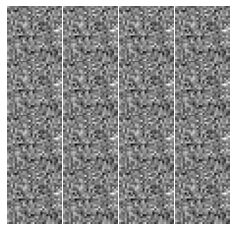

Epoch 1/20
 403/1875 [=====>........................] - ETA: 17s - loss: 0.2675 - accuracy: 0.0797

KeyboardInterrupt: ignored

In [61]:
fig, axs = plt.subplots(4, 4, figsize=(4,4))
rand = x_test[np.random.randint(0, 10000, 16)].reshape((4, 4, 1, 28, 28))

display.clear_output()

for i in range(4):
    for j in range(4):
        axs[i, j].imshow(model.predict(rand[i, j])[0], cmap = "gray")
        axs[i, j].axis("off")

plt.subplots_adjust(wspace = 0, hspace = 0)
plt.show()
model.fit(x_train, x_train, batch_size = 32,epochs=20, verbose=1)

for i in range(4):
    for j in range(4):
        axs[i, j].imshow(model.predict(rand[i, j])[0], cmap = "gray")
        axs[i, j].axis("off")
